In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import math

df = pd.read_csv(r'C:\Users\Orik_\VSProjects\Analysing-pharmaceutical-sales-data\data\salesdaily.csv')
print(df.head)

<bound method NDFrame.head of           datum  M01AB   M01AE  N02BA  N02BE  N05B  N05C   R03   R06  Year  \
0      1/2/2014   0.00   3.670   3.40  32.40   7.0   0.0   0.0  2.00  2014   
1      1/3/2014   8.00   4.000   4.40  50.60  16.0   0.0  20.0  4.00  2014   
2      1/4/2014   2.00   1.000   6.50  61.85  10.0   0.0   9.0  1.00  2014   
3      1/5/2014   4.00   3.000   7.00  41.10   8.0   0.0   3.0  0.00  2014   
4      1/6/2014   5.00   1.000   4.50  21.70  16.0   2.0   6.0  2.00  2014   
...         ...    ...     ...    ...    ...   ...   ...   ...   ...   ...   
2101  10/4/2019   7.34   5.683   2.25  22.45  13.0   0.0   1.0  1.00  2019   
2102  10/5/2019   3.84   5.010   6.00  25.40   7.0   0.0   0.0  0.33  2019   
2103  10/6/2019   4.00  11.690   2.00  34.60   6.0   0.0   5.0  4.20  2019   
2104  10/7/2019   7.34   4.507   3.00  50.80   6.0   0.0  10.0  1.00  2019   
2105  10/8/2019   0.33   1.730   0.50  44.30  20.0   2.0   2.0  0.00  2019   

      Month  Hour Weekday Name  


M01AB    10600.937083
M01AE     8204.618646
N02BA     8172.209000
N02BE    63005.402708
N05B     18645.737500
N05C      1249.958333
R03      11608.822917
R06       6107.817500
dtype: float64


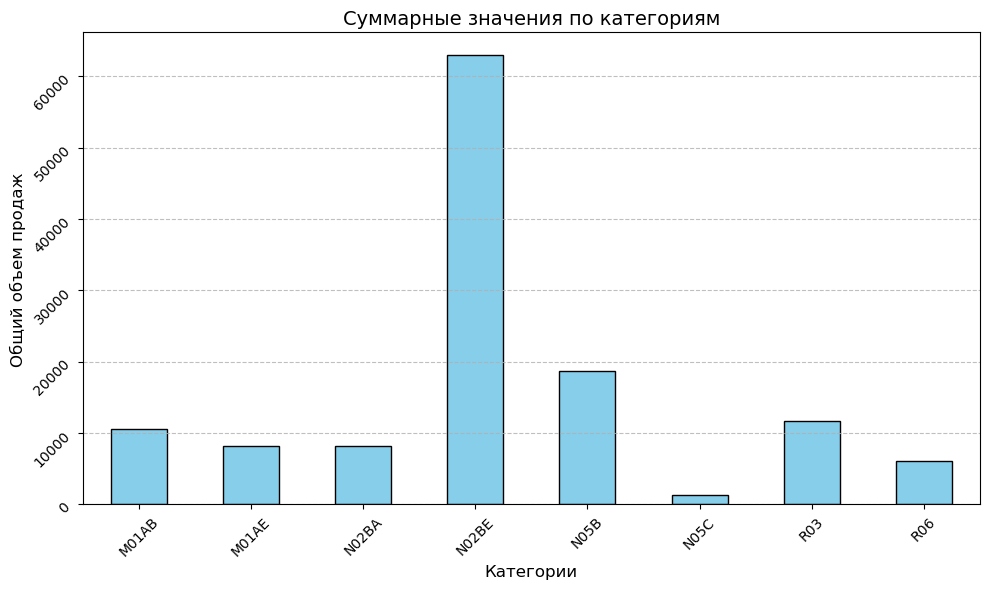

In [41]:
"Каковы общие объемы продаж для каждой категории лекарственных препаратов (код ATC)"
sales_for_each_cat = df.loc[:, 'M01AB':'R06'].sum(axis=0)
print(sales_for_each_cat)

plt.figure(figsize=(10, 6))
sales_for_each_cat.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Суммарные значения по категориям', fontsize=14)
plt.xlabel('Категории', fontsize=12)
plt.ylabel('Общий объем продаж', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.8)
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.tight_layout()
plt.show()

Категория с масимальной продажей N02BE


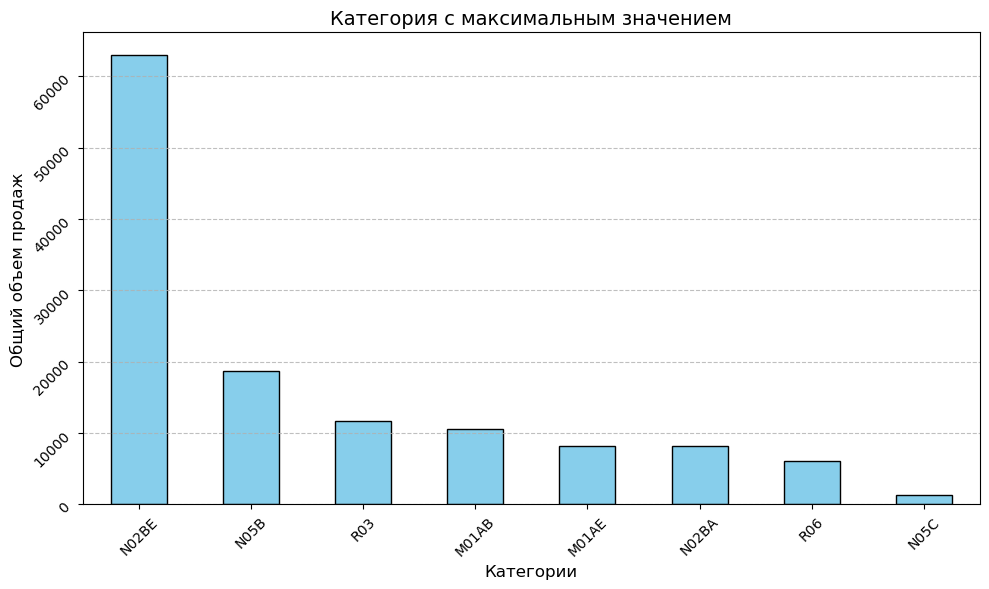

In [60]:
"Какие отдельные марки лекарственных препаратов имеют наибольший общий объем продаж?"
max_amount_of_sales = df.loc[:,'M01AB':'R06'].sum(axis=0).sort_values(ascending=False)
max_cat = max_amount_of_sales.index[0]
print(f'Категория с масимальной продажей {max_cat}')

plt.figure(figsize=(10,6))
max_amount_of_sales.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Категория с максимальным значением', fontsize=14)
plt.xlabel('Категории', fontsize=12)
plt.ylabel('Общий объем продаж', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.8)
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.tight_layout()
plt.show()

Препараты имеющие наибольшие продажи в январе 2015 года:
N02BE    1044.24
N05B      463.00
R03       177.25
Name: (2015, 1), dtype: float64
Препараты имеющие наибольшие продажи в июле 2016 года:
N02BE    652.362000
N05B     240.000000
M01AB    194.528333
Name: (2016, 7), dtype: float64
Препараты имеющие наибольшие продажи в сентябре 2017 года:
N02BE    863.75
N05B     223.00
R03      139.00
Name: (2017, 9), dtype: float64


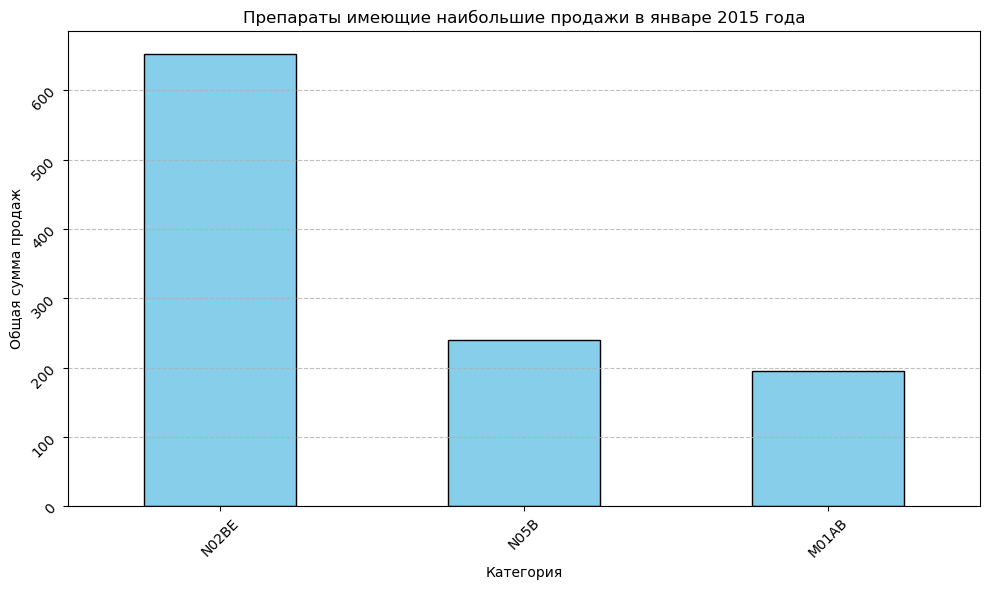

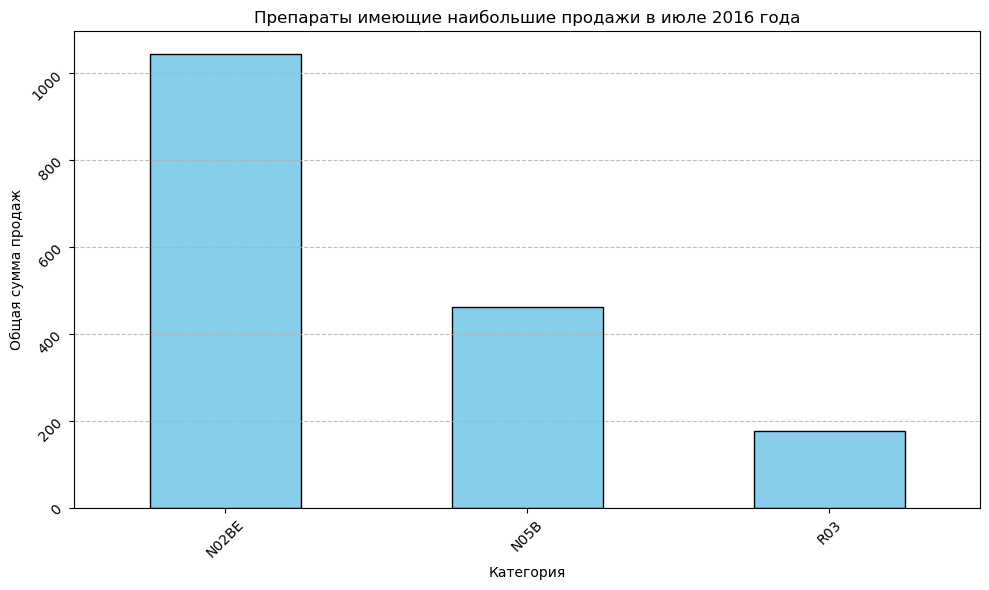

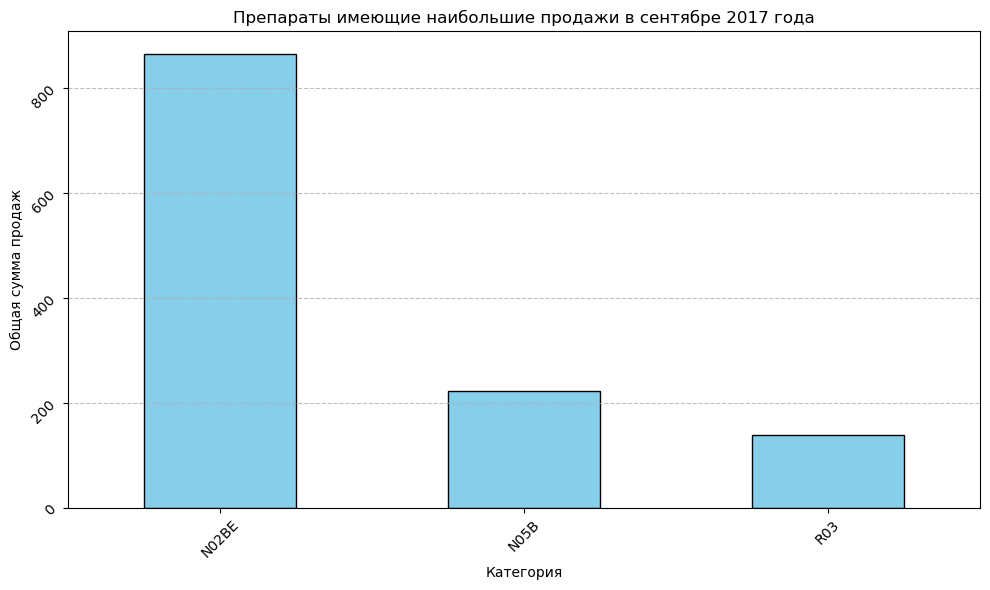

In [139]:
"Какие три препарата имели наибольшие продажи в январе 2015 года, июле 2016 года и сентябре 2017 года?"
monthly_sales = df.groupby(['Year', 'Month']).sum().loc[:,'M01AB':'R06']
jan_2015 = monthly_sales.loc[(2015, 1)].sort_values(ascending=False).head(3)
jul_2016 = monthly_sales.loc[(2016, 7)].sort_values(ascending=False).head(3)
sep_2017 = monthly_sales.loc[(2017, 9)].sort_values(ascending=False).head(3)
print(f'Препараты имеющие наибольшие продажи в январе 2015 года:\n{jan_2015}')
print(f'Препараты имеющие наибольшие продажи в июле 2016 года:\n{jul_2016}')
print(f'Препараты имеющие наибольшие продажи в сентябре 2017 года:\n{sep_2017}')

plt.figure(figsize=(10,6))
jul_2016.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Препараты имеющие наибольшие продажи в январе 2015 года')
plt.xlabel('Категория')
plt.ylabel('Общая сумма продаж')
plt.grid(axis='y', linestyle='--', alpha=0.8)
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10,6))
jan_2015.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Препараты имеющие наибольшие продажи в июле 2016 года')
plt.xlabel('Категория')
plt.ylabel('Общая сумма продаж')
plt.grid(axis='y', linestyle='--', alpha=0.8)
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10,6))
sep_2017.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Препараты имеющие наибольшие продажи в сентябре 2017 года')
plt.xlabel('Категория')
plt.ylabel('Общая сумма продаж')
plt.grid(axis='y', linestyle='--', alpha=0.8)
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.tight_layout()
plt.show()

В 2017 году чаще всего продвался N02BE


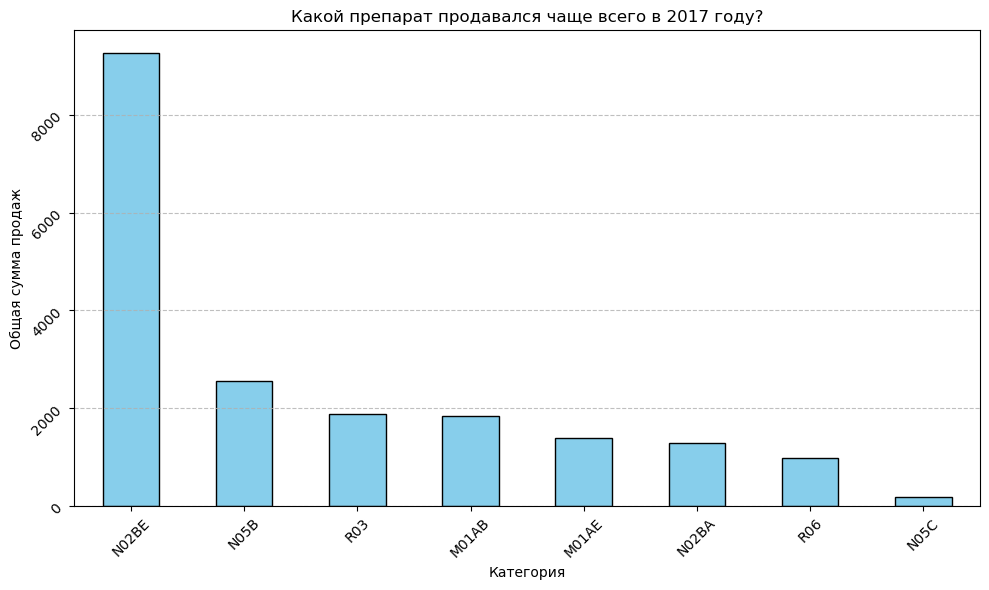

In [148]:
"Какой препарат продавался чаще всего в 2017 году?"

most_sales_in_2017 = df.groupby(['Year']).sum().loc[2017, 'M01AB':'R06'].sort_values(ascending=False)
print(f'В 2017 году чаще всего продвался {most_sales_in_2017.index[0]}')

plt.figure(figsize=(10,6))
most_sales_in_2017.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Какой препарат продавался чаще всего в 2017 году?')
plt.xlabel('Категория')
plt.ylabel('Общая сумма продаж')
plt.grid(axis='y', linestyle='--', alpha=0.8)
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.tight_layout()
plt.show()

N02BE имеет самые высокие среднесуточные продажи со значением: 29.917095303105413


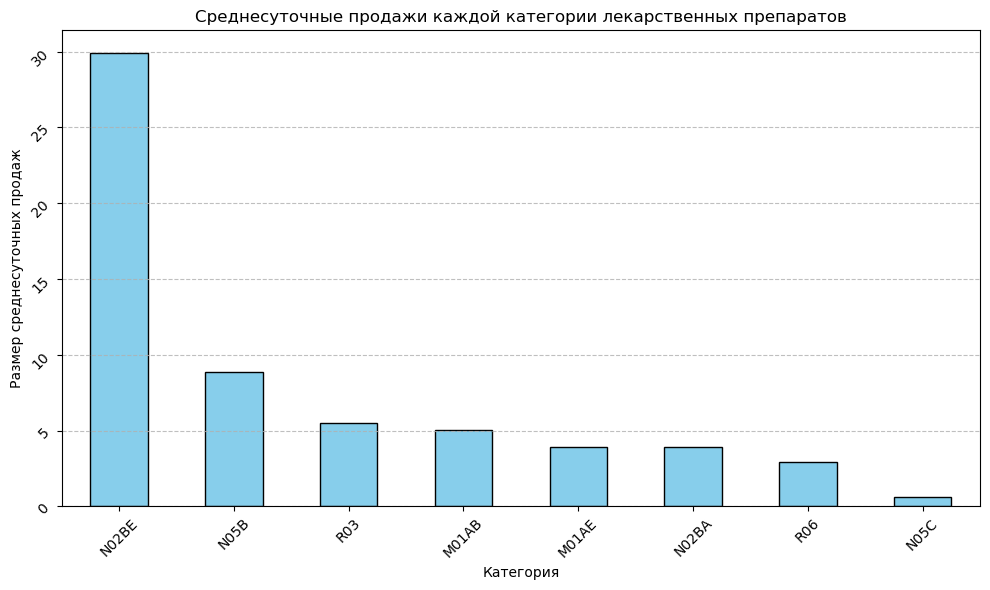

In [167]:
"Какая категория лекарственных препаратов имеет самые высокие среднесуточные продажи?" 

avg_daily_sales = df.loc[:, 'M01AB':'R06'].mean().sort_values(ascending=False)
print(f'{avg_daily_sales.index[0]} имеет самые высокие среднесуточные продажи со значением: {avg_daily_sales.values[0]}')

plt.figure(figsize=(10,6))
avg_daily_sales.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Среднесуточные продажи каждой категории лекарственных препаратов')
plt.xlabel('Категория')
plt.ylabel('Размер среднесуточных продаж')
plt.grid(axis='y', linestyle='--', alpha=0.8)
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.tight_layout()
plt.show()

Month
1     6.835980
2     6.896943
3     6.290323
4     5.771528
5     5.006944
6     4.350000
7     2.956989
8     3.102151
9     4.402315
10    7.208589
11    6.226667
12    7.916129
Name: R03, dtype: float64


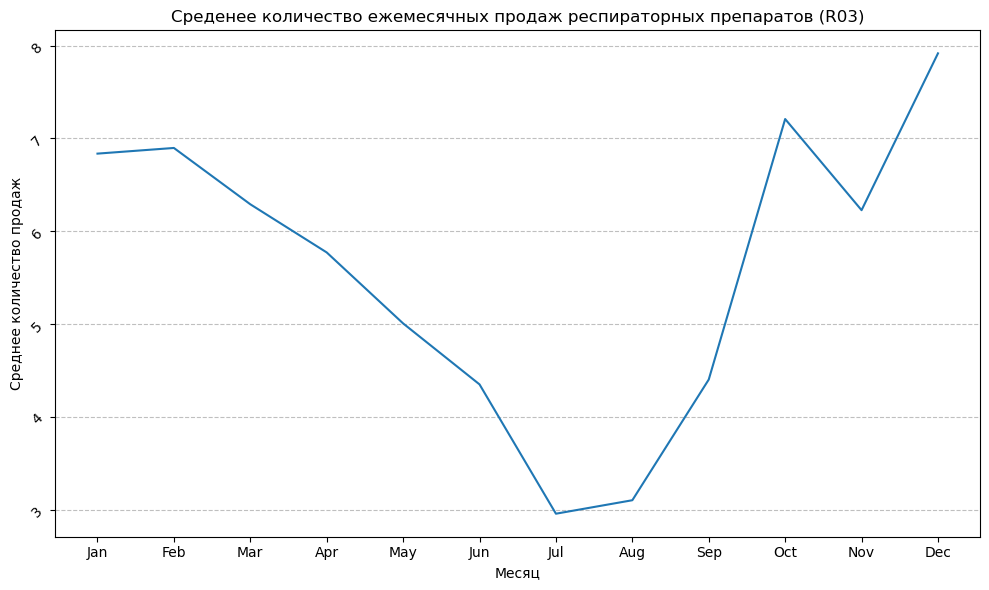

In [188]:
"Продаются ли респираторные препараты (R03) чаще в определенные месяцы?"

RO3_sales = df.groupby('Month')['R03'].mean()
print(RO3_sales)

plt.figure(figsize=(10,6))
RO3_sales.plot(kind='line')
plt.title('Среденее количество ежемесячных продаж респираторных препаратов (R03)')
plt.xlabel('Месяц')
plt.ylabel('Среднее количество продаж')
plt.grid(axis='y', linestyle='--', alpha=0.8)
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.yticks(rotation=45)
plt.tight_layout()
plt.show()